# Part 1

- Inspecting data
- Cleaning data
- Transforming data

## Exercise 1

What is the title of the first movie in the dataset?

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

In [19]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


## Exercise 2

In Exercise 2, we will define the regression and classification outcomes. Specifically, we will use the revenue column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions
- Create a new column in df called profitable, defined as 1 if the movie revenue (revenue) is greater than the movie budget (budget), and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification. Define regression_target as the string 'revenue'. Define classification_target as the string 'profitable'.

How many movies in this dataset are defined as profitable (value 1)?

In [20]:
prof = np.where(df.revenue > df.budget, 1, 0)

df['profitable'] = prof

In [21]:
df.profitable.value_counts()

1    2585
0    2218
Name: profitable, dtype: int64

In [22]:
regression_target = 'revenue'
classification_target = 'profitable'

## Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In Exercise 3, we will remove rows with any infinite or missing values.

#### Instructions
- Use df.replace() to replace any cells with type np.inf or -np.inf with np.nan.
- Drop all rows with any np.nan values in that row using df.dropna(). Do any further arguments need to be specified in this function to remove rows with any such values?

How many movies are left in the dataset after dropping any rows with infinite or missing values?

In [23]:
df.replace(np.inf, np.nan)
df.replace(-np.inf, np.nan)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",1
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",1
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An...",1
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action, Crime, Thriller",NaN,9367,"united states–mexico barrier, legs, arms, pape...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,...,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar...",1
4799,9000,"Comedy, Romance",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca...",0
4800,0,"Comedy, Drama, Romance, TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date, love at first sight, narration, investig...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures, Muse Entertainment Ente...",...,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6,231617,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",0
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ...",0


In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(1406, 23)

## Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions
- Determine all the genres in the genre column. Make sure to use the strip() function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind that a movie may belong to several genres at once.
- Call df[genres].head() to view your results.

How many genres of movies are in this dataset?

In [26]:
list_genres = df.genres.apply(lambda x: x.split(","))
genres = []
for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre)

for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

In [27]:
df[genres].head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In Exercise 5, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions
- Call plt.show() to observe the plot generated by the code given below. Which of the covariates and/or outcomes are correlated with each other?
- Call skew() on the columns outcomes_and_continuous_covariates in df. Is the skew above 1 for any of these variables?

Here is the code to get you started:

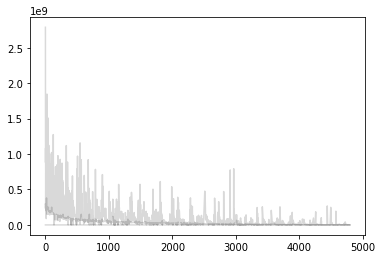

budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64


In [28]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

plt.figure()
plt.plot(df[plotting_variables], alpha=0.15, color=(0,0,0))
#axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       #color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
plt.show()

print(df[outcomes_and_continuous_covariates].skew())

## Exercise 6

It appears that the variables budget, popularity, runtime, vote_count, and revenue are all right-skewed. In Exercise 6, we will transform these variables to eliminate this skewness. Specifically, we will use the np.log10() method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions
For each above-mentioned variable in df, transform value x into np.log10(1+x).

What is the new value of skew() for the covariate runtime? Please provide the answer to 3 decimal points.

In [31]:
for covariate in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
    df[covariate] = df[covariate].apply(lambda x: np.log10(1+x))

In [32]:
print(df[outcomes_and_continuous_covariates].skew())

budget         -2.816990
popularity     -0.431543
runtime         0.530489
vote_count     -0.677632
vote_average   -1.080038
revenue        -2.177372
profitable     -1.081030
dtype: float64


## Exercise 7

Now we're going to save our dataset to use in Part 2 of this case study.

#### Instructions
Use to_csv() to save the df object as movies_clean.csv.

What is the correct way to save the df object?

In [33]:
df.to_csv('movies_clean.csv')

# Part 2

- using regression and classification to analyse the data

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv')

## Exercise 1

In Exercise 1, we will instantiate regression and classification models. Code is provided that prepares the covariates and outcomes we will use for data analysis.

#### Instructions
- Instantiate LinearRegression(), LogisticRegression(), RandomForestRegressor(), and RandomForestClassifier() objects, and assign them to linear_regression, logistic_regression, forest_regression, and forest_classifier, respectively.
- For the random forests models, specify max_depth=4 and random_state=0.
Fill in the code below:

In [36]:
# Define all covariates and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
covariates = df[all_covariates]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

## Exercise 2

In Exercise 2, we will create two functions that compute a model's score. For regression models, we will use correlation as the score. For classification models, we will use accuracy as the score.

#### Instructions
- Define a function called correlation with arguments estimator, X, and y. The function should compute the correlation between the observed outcome y and the outcome predicted by the model.
    - To obtain predictions, the function should first use the fit method of estimator and then use the predict method from the fitted object.
    - The function should return the first argument from r2_score comparing predictions and y.
- Define a function called accuracy with the same arguments and code, substituting accuracy_score for r2_score.

What is the correct way to obtain predictions using the model estimator?

In [40]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return r2_score(y, predictions)
    

In [41]:
def accuracy(estimator, X, y):
    predictions = estimator.fit(X,y).predict(X)
    return accuracy_score(y, predictions)

## Exercise 3

In Exercise 3, we will compute the cross-validated performance for the linear and random forest regression models.

#### Instructions
- Call cross_val_score using linear_regression and forest_regression as models. Store the output as linear_regression_scores and forest_regression_scores, respectively.
    - Set the parameters cv=10 to use 10-fold cross-validation and scoring=correlation to use the correlation function defined in Exercise 2.
- Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Consider which of the two models exhibits a better fit.

Here is the code framework for you to use:

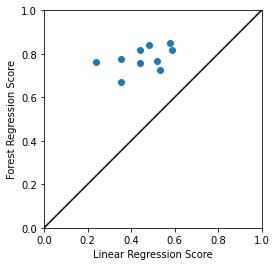

In [48]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

plt.show()

## Exercise 4

In Exercise 4, we will compute the cross-validated performance for the linear and random forest classification models.

#### Instructions
- Call cross_val_score using logistic_regression and forest_classifier as models. Store the output as logistic_regression_scores and forest_classification_scores, respectively.
    - Set the parameters cv=10 to use 10-fold cross-validation and scoring=accuracy to use the accuracy function defined in Exercise 2.
- Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the accuracy of predicted profitability for each cross-validation fold using the logistic and random forest classification models.
- Consider which of the two models exhibits a better fit.

Here is the code framework for you to use:

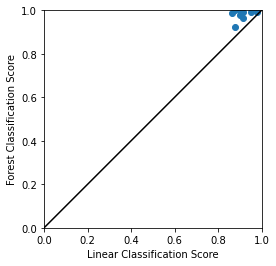

In [50]:
# Determine the cross-validated accuracy for logistic and random forest models.
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

plt.show()

## Exercise 5

In Exercise 5, we will rerun the regression analysis for this subsetted dataset.

#### Instructions
- Define positive_revenue_df as the subset of movies in df with revenue greater than zero.
- Code is provided below that creates new instances of model objects. Replace all instances of df with positive_revenue_df, and run the given code.

Use this code to get started:

In [51]:
positive_revenue_df = df[df.revenue > 0]

# Replace the dataframe in the following code, and run.
regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

In [52]:
forest_regression_scores.mean()

0.7680846546233253

## Exercise 6

In Exercise 6, we will compute the cross-validated performance for the linear and random forest regression models for positive revenue movies only.

#### Instructions
- Call cross_val_score using linear_regression and forest_regression as models. Store the output as linear_regression_scores and forest_regression_scores, respectively.
    - Set the parameters cv=10 to use 10-fold cross-validation and scoring=correlation to use the correlation function defined in Exercise 2.
- Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models. Consider which of the two models exhibits a better fit. Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting revenue using the random forest regressor. Consider which variables are the most important.

Here is the code to get you started:

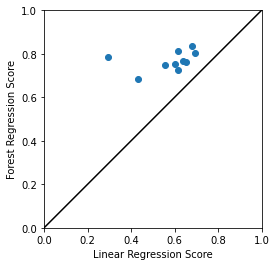

[('Fantasy', 0.0),
 ('Music', 0.0),
 ('TV Movie', 0.0),
 ('Foreign', 0.0),
 ('Documentary', 5.024210288408997e-05),
 ('Romance', 6.604583330721587e-05),
 ('Western', 0.0001562686482634738),
 ('Thriller', 0.0001582172819023731),
 ('Mystery', 0.00018214788588276075),
 ('Horror', 0.00020010584158045158),
 ('War', 0.0002156879417358699),
 ('Action', 0.0003973119401474463),
 ('History', 0.0004223908705396498),
 ('Family', 0.00045869945111661517),
 ('Comedy', 0.000506826926522442),
 ('Animation', 0.000931800422848664),
 ('Science Fiction', 0.0009980285384426234),
 ('Crime', 0.00101309857174437),
 ('Drama', 0.0013281289930065165),
 ('Adventure', 0.0030803030401070786),
 ('vote_average', 0.0066467146346399835),
 ('runtime', 0.016135965006071746),
 ('popularity', 0.083552965693875),
 ('budget', 0.30757299732366344),
 ('vote_count', 0.5759260530517183)]

In [53]:

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

plt.show()

# Print the importance of each covariate in the random forest regression.
forest_regression.fit(covariates, regression_outcome)
sorted(list(zip(all_covariates, forest_regression.feature_importances_)), key=lambda tup: tup[1])

## Exercise 7

In Exercise 7, we will compute the cross-validated performance for the logistic regression and random forest classification models for positive revenue movies only.

#### Instructions
- Call cross_val_score using logistic_regression and forest_classifier as models. Store the output as logistic_regression_scores and forest_classification_scores, respectively.
    - Set the parameters cv=10 to use 10-fold cross-validation and scoring=accuracy to use the accuracy function defined in Exercise 2.
- Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the correlation between actual and predicted revenue for each cross-validation fold using the logistic regression and random forest classification models. Consider which of the two models exhibits a better fit. Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting profitability using the random forest classifier. Consider which variables are the most important.

Here is the code to get you started:

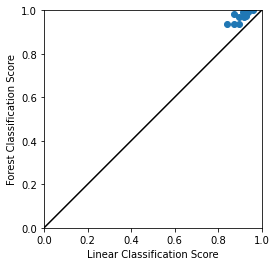

[('TV Movie', 0.0),
 ('Horror', 0.001715202327676785),
 ('Animation', 0.0019388197444951466),
 ('Comedy', 0.0022574689899296065),
 ('Foreign', 0.0022801352325337114),
 ('Documentary', 0.002846458591904433),
 ('Romance', 0.0031608732977368944),
 ('Thriller', 0.0035569898966812397),
 ('Mystery', 0.004282452349394276),
 ('Music', 0.004308655018573079),
 ('Fantasy', 0.0051937079152913745),
 ('Western', 0.005480591973153852),
 ('Family', 0.0066609392542522055),
 ('Crime', 0.006772395781754328),
 ('History', 0.006793172805113654),
 ('Action', 0.0073412694021133835),
 ('Adventure', 0.007596959755592538),
 ('Science Fiction', 0.010816587516514861),
 ('War', 0.011275947022575308),
 ('Drama', 0.023093574562804687),
 ('runtime', 0.04154729351420867),
 ('budget', 0.08765680648089587),
 ('vote_average', 0.10261105225795153),
 ('popularity', 0.2811360280003983),
 ('vote_count', 0.36967661830845444)]

In [54]:

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

plt.show()

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(covariates, classification_outcome)
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])